In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import base64
import us as us
from sklearn import preprocessing

In [12]:
# for json formatted info

# with open('data/borough_data.json') as f:
#     borough_data=json.load(f)
# borough_data

with open('data/state_funding.csv') as f:
    funds_df=pd.read_csv(f, delimiter=',')

In [25]:
funds_df.head()

,State,Total Funding,Funding Based on Average Number of Unemployed,Funding from Even Distribution,CRF Top-Up
0,Alabama,"$2,120,279,417.00","$1,620,279,417.00","$500,000,000.00",$0.00
1,Alaska,"$1,011,788,220.00","$511,788,220.00","$500,000,000.00",$0.00
2,Arizona,"$4,182,827,491.60","$3,682,827,491.60","$500,000,000.00",$0.00
3,Arkansas,"$1,573,121,580.80","$1,073,121,580.80","$500,000,000.00",$0.00
4,California,"$27,017,016,860.10","$26,517,016,860.10","$500,000,000.00",$0.00


In [199]:
# keeping the state and the total funds allocated to each state, for 2021
funds_df = funds_df.drop(labels=['Funding Based on Average Number of Unemployed', 'Funding from Even Distribution', 'CRF Top-Up'], axis=1) #only interested in the total funding
funds_df.loc[:, "Total Funding"] = funds_df.loc[:, "Total Funding"].str.replace(r"$", "", regex=True)
funds_df.loc[:, "Total Funding"] = funds_df.loc[:, "Total Funding"].str.replace(r".", "", regex=True)
funds_df.loc[:, "Total Funding"] = funds_df.loc[:, "Total Funding"].str.replace(r",", "", regex=True) #remove irrelevant characters from numerics
funds_df = pd.melt(funds_df, id_vars=['State'], value_vars=['Total Funding'], ignore_index=True) #reorganizing the dataframe with the states as index values
funds_df = funds_df.drop(labels="variable", axis=1)
funds_df = funds_df.dropna()
funds_df = funds_df.rename({"value":"Total Funds"}, axis=1)
funds_df.head()

,State,Total Funds
0,Alabama,212027941700
1,Alaska,101178822000
2,Arizona,418282749160
3,Arkansas,157312158080
4,California,2701701686010


In [200]:
#responsible for converting the monetary values to billions
def convert_to_billions(vals):
    new_vals = []
    for val in vals:
        val = val.replace(val[-8:], "")
        val = val[0:len(val) - 3] + '.' + val[-3:]
        new_vals.append(val)
    return new_vals

vals = funds_df["Total Funds"].values
funds_df["Total Funds"] = pd.Series(convert_to_billions(vals))
funds_df = pd.DataFrame(data=funds_df["Total Funds"].values, index=funds_df["State"], columns=["Total Funds (in billions)"] )
funds_df = funds_df.copy().drop(index=51)

,State,Total Funds
0,Alabama,2.120
1,Alaska,1.011
2,Arizona,4.182
3,Arkansas,1.573
4,California,27.017
5,Colorado,3.828
6,Connecticut,2.812
7,Delaware,.924
8,District of Columbia,1.802
9,Florida,8.816


In [213]:
# saved the df as csv
# funds_df.to_csv('data/cleaned_state_funds.csv')

In [65]:
with open('data/cleaned_state_funds.csv') as f:
    clean_funds_df=pd.read_csv(f, delimiter=',')

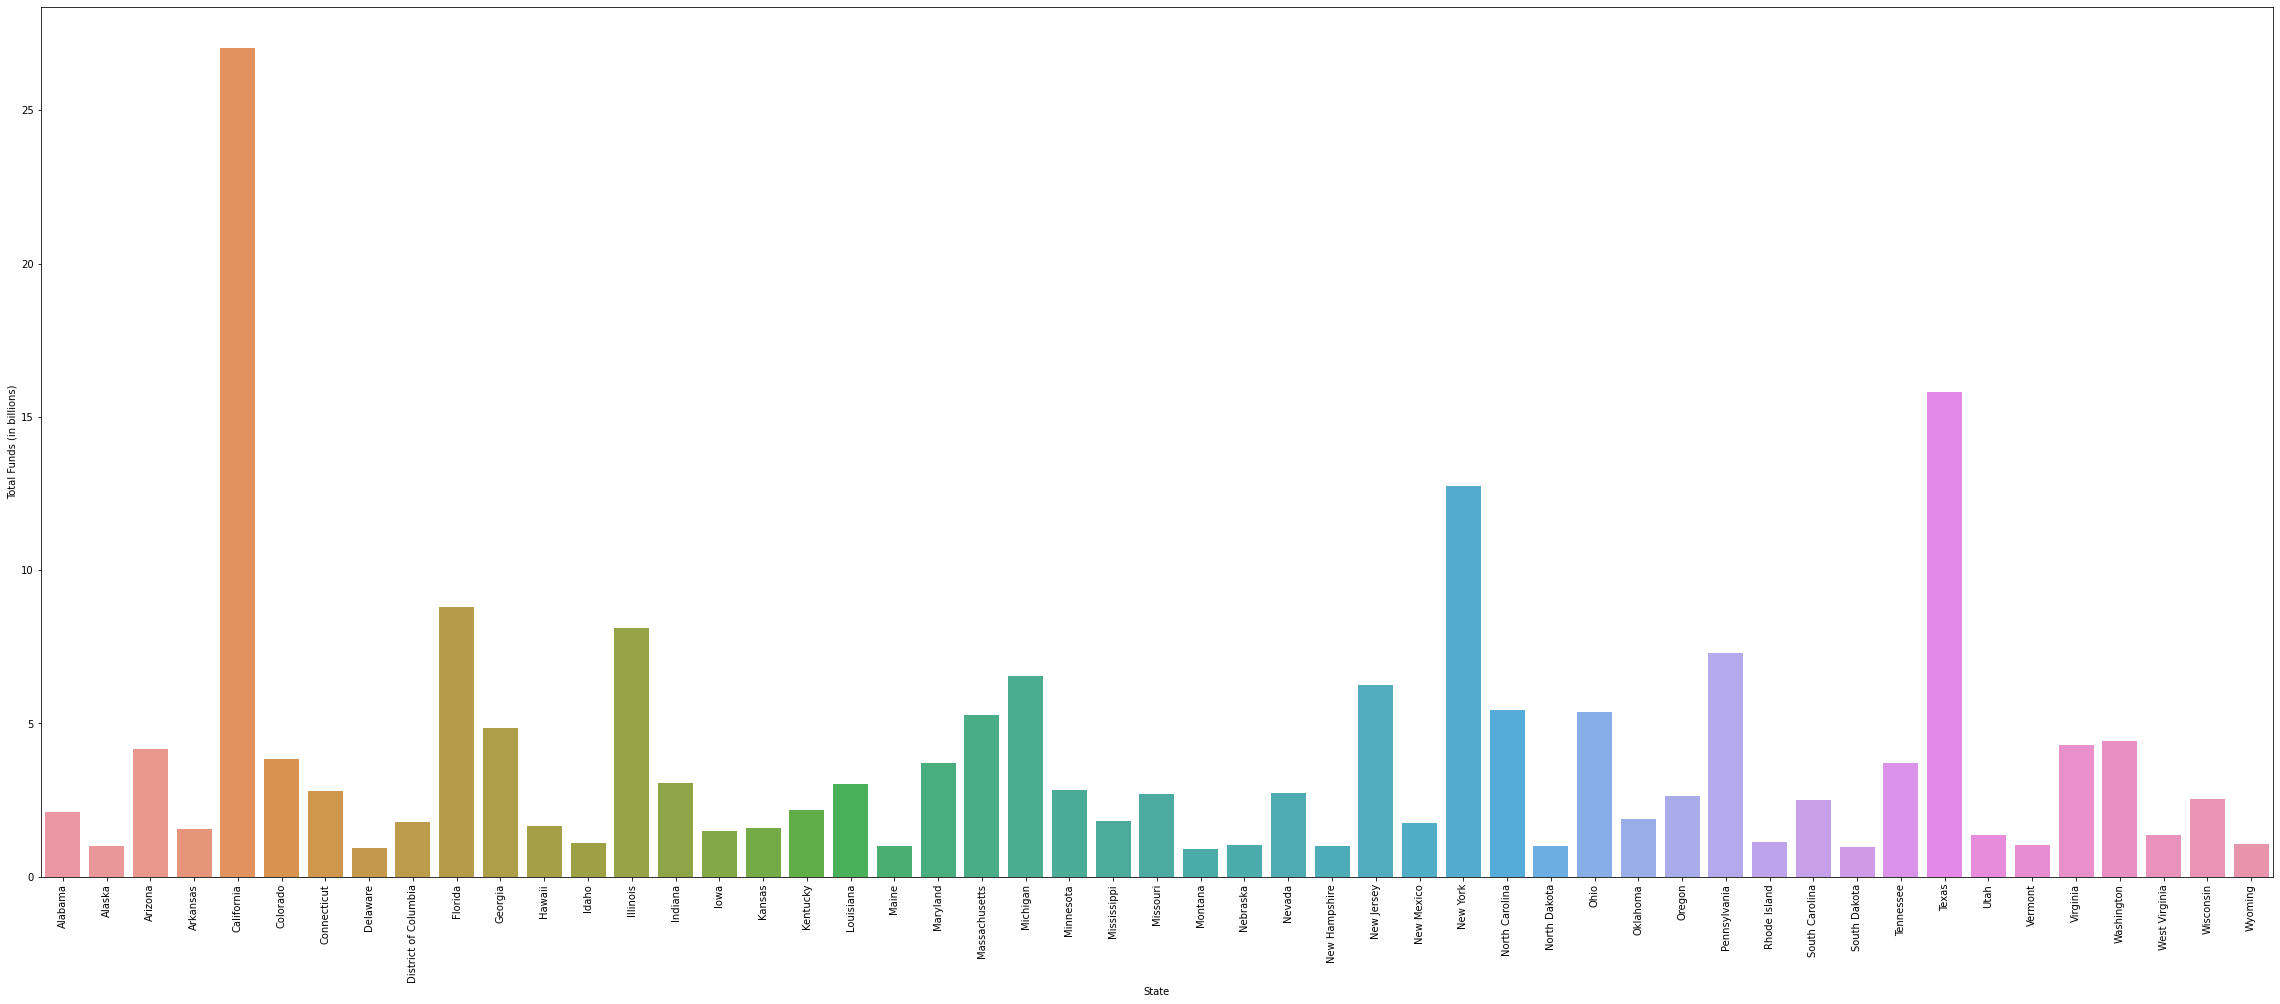

In [14]:
fig, ax = plt.subplots(figsize=(30,16))
plt.subplots_adjust(hspace=0.5)

ax = sns.barplot(data=clean_funds_df, x=clean_funds_df.State, y=clean_funds_df['Total Funds (in billions)']).set_xticklabels(labels=clean_funds_df.State, rotation=90)

In [34]:
# clean_funds_df = clean_funds_df.drop(columns="Unnamed: 0")
# clean_funds_df.to_csv('data/cleaned_state_funds.csv', index=False)

In [66]:
with open('data/CARES_state_funds_2020.csv') as f:
    cares_funds_df=pd.read_csv(f, delimiter=',')

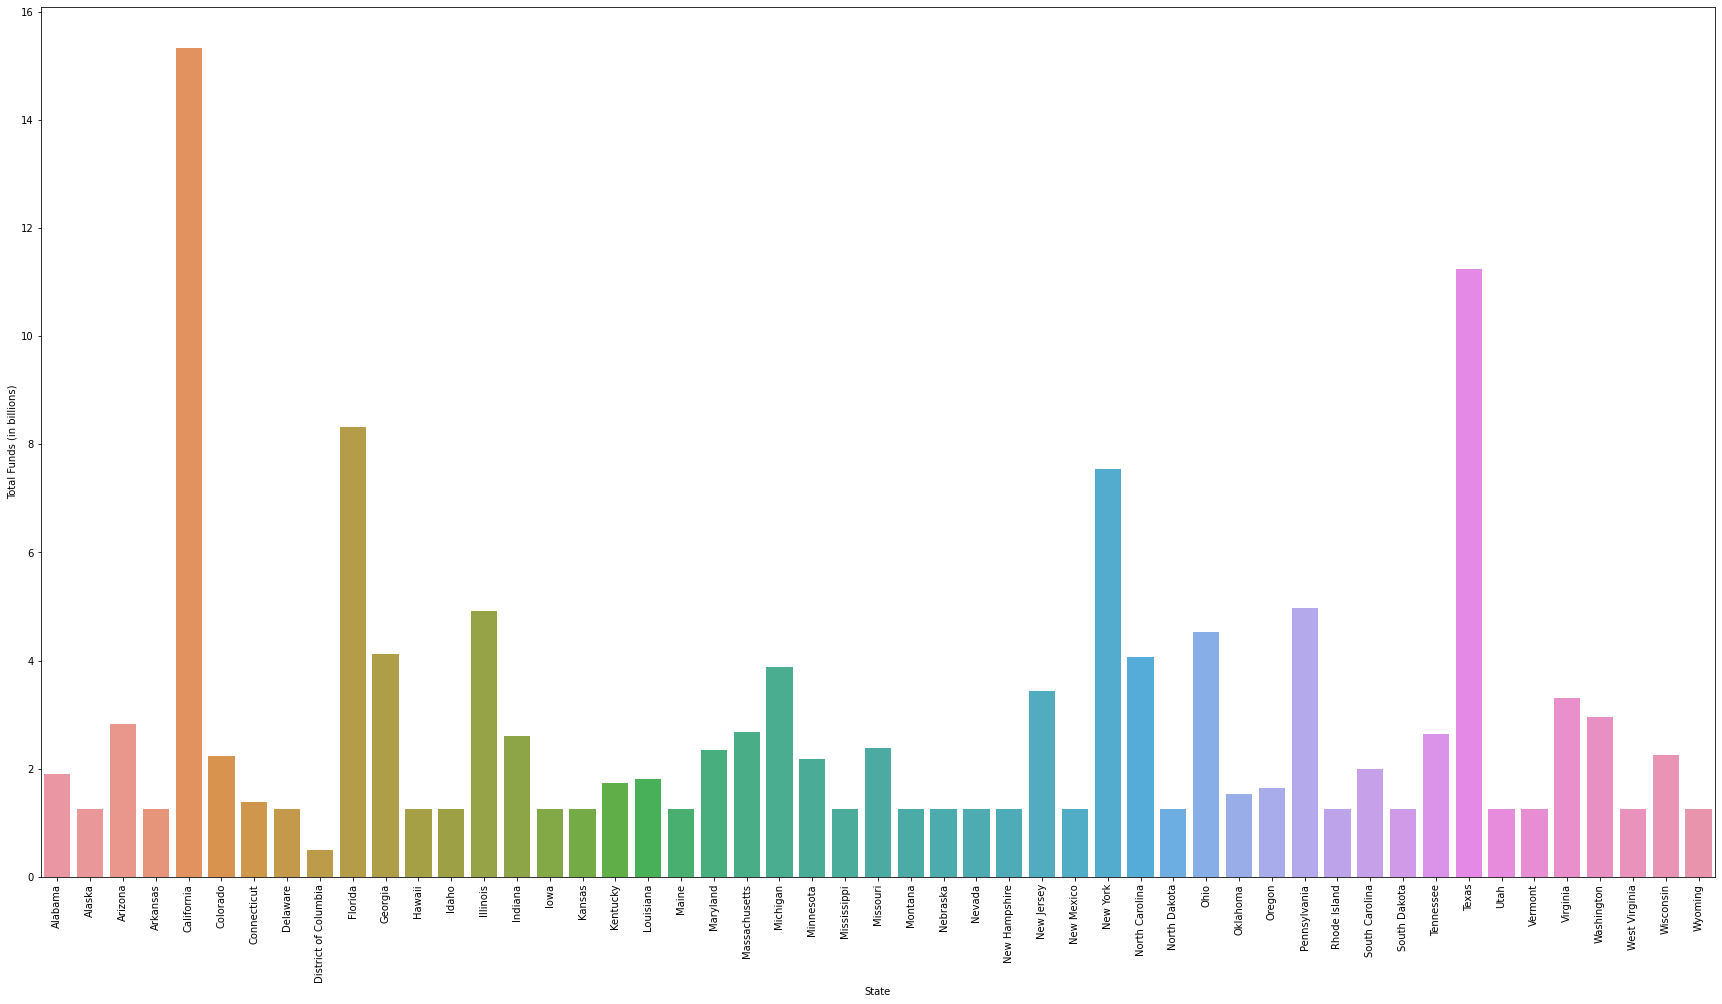

In [25]:
fig, ax = plt.subplots(figsize=(30,16))
plt.subplots_adjust(hspace=0.5)

ax = sns.barplot(data=cares_funds_df, x=cares_funds_df.State, y=cares_funds_df['Total Funds (in billions)']).set_xticklabels(labels=cares_funds_df.State, rotation=90)

In [24]:
# cares_funds_df = cares_funds_df.drop(columns="Unnamed: 0")
# cares_funds_df.to_csv('data/CARES_state_funds_2020.csv', index=False)

In [67]:
# merged 2 datasets into one final funds per state dataset

clean_funds_df.columns = ['State', 'Total Funds for 2021 (in billions)']
cares_funds_df.columns = ['State', 'Total Funds for 2020 (in billions)']
clean_funds_df = clean_funds_df.merge(cares_funds_df, how="inner", on="State")
# clean_funds_df = clean_funds_df.set_index('State')
clean_funds_df.to_csv('data/final_state_funds.csv', index=False)

### Run the cell below to get the new state funds results per year

In [68]:
with open('data/final_state_funds.csv') as f:
    final_state_funds=pd.read_csv(f, delimiter=',')

In [69]:
final_state_funds.head()

,State,Total Funds for 2021 (in billions),Total Funds for 2020 (in billions)
0,Alabama,2.120,1.901
1,Alaska,1.011,1.250
2,Arizona,4.182,2.822
3,Arkansas,1.573,1.250
4,California,27.017,15.321


In [52]:
# final_state_funds = final_state_funds.set_index('State')

In [16]:
final_state_funds.dtypes

State                                  object
Total Funds for 2021 (in billions)    float64
Total Funds for 2020 (in billions)    float64
dtype: object

In [70]:
# with open('data/2019_Census_US_Population_Data_By_State_Lat_Long.csv') as f:
#     population_df=pd.read_csv(f, delimiter=',')
    
with open('data/final_state_funds_with_pop.csv') as f:
    population_df=pd.read_csv(f, delimiter=',')

In [104]:
# funds per person
# population_df = population_df.rename(columns={'STATE':'State', 'POPESTIMATE2019':'Estimated Population (2019)', 'lat':'Latitude (of Capital)', 'long':'Longitude (of Capital)'})
# population_df = final_state_funds.merge(population_df, on="State")

# population_df["Funds Per Person (2021)"] = (population_df["Total Funds for 2021 (in billions)"] * (10**9))/population_df["Estimated Population (2019)"]
# population_df["Funds Per Person (2020)"] = (population_df["Total Funds for 2020 (in billions)"] * (10**9))/population_df["Estimated Population (2019)"]
population_df

,State,Total Funds for 2021 (in billions),Total Funds for 2020 (in billions),Estimated Population (2019),Latitude (of Capital),Longitude (of Capital),Funds Per Person (2021),Funds Per Person (2020),Normalized Funds 2021,Normalized Funds 2020,Normalized Per Person Funds 2021,Normalized Per Person Funds 2020
0,Alabama,2.120,1.901,4903185,32.377716,-86.300568,432.372019,387.707174,0.050783,0.069633,0.079142,0.070438
1,Alaska,1.011,1.250,731545,58.301598,-134.420212,1382.006575,1708.712383,0.024218,0.045787,0.252964,0.310438
2,Arizona,4.182,2.822,7278717,33.448143,-112.096962,574.551806,387.705690,0.100176,0.103368,0.105167,0.070438
3,Arkansas,1.573,1.250,3017804,34.746613,-92.288986,521.239948,414.208477,0.037680,0.045787,0.095408,0.075253
4,California,27.017,15.321,39512223,38.576668,-121.493629,683.763098,387.753430,0.647166,0.561201,0.125157,0.070447
5,Colorado,3.828,2.233,5758736,39.739227,-104.984856,664.729204,387.758703,0.091696,0.081794,0.121673,0.070448
6,Connecticut,2.812,1.382,3565287,41.764046,-72.682198,788.716308,387.626578,0.067359,0.050622,0.144368,0.070424
7,Delaware,0.924,1.250,973764,39.157307,-75.519722,948.895215,1283.678592,0.022134,0.045787,0.173687,0.233218
8,Florida,8.816,8.328,21477737,30.438118,-84.281296,410.471550,387.750348,0.211179,0.305051,0.075133,0.070446
9,Georgia,4.853,4.117,10617423,33.749027,-84.388229,457.078898,387.758875,0.116249,0.150804,0.083664,0.070448


In [124]:
# population_df.to_csv('data/final_state_funds_with_pop.csv', index=False)

In [96]:
# used for population, failed

# pop_cols = ['NAME', 'POPESTIMATE2019']
# population_df = population_df[pop_cols]
# population_df = population_df.groupby(['NAME'], as_index=False).sum()
# population_df = population_df.rename(columns={'NAME':'State'})
# state_pop_funds = final_state_funds.merge(population_df, on="State")

population_df.to_csv('data/final_state_funds_with_pop.csv', index=False)

### Normalizing the values

In [97]:
with open('data/final_state_funds_with_pop.csv') as f:
    population_df=pd.read_csv(f, delimiter=',')

In [99]:
# population_df=population_df.loc[population_df['State'] != "District of Columbia"].reset_index().drop(columns='index')

#### Normalized the total funds cols

In [105]:
funds_2021_arr = np.array(population_df['Total Funds for 2021 (in billions)'])
funds_2020_arr = np.array(population_df['Total Funds for 2020 (in billions)'])
normalized_2021 = preprocessing.normalize([funds_2021_arr])
normalized_2020 = preprocessing.normalize([funds_2020_arr])
normal_list = []
normal_list2 = []
for element in normalized_2021[0]:
    normal_list.append(element)
for element in normalized_2020[0]:
    normal_list2.append(element)

normal_series = pd.Series(normal_list)
normal_series2 = pd.Series(normal_list2)

population_df['Normalized Funds 2021'] = normal_series
population_df['Normalized Funds 2020'] = normal_series2

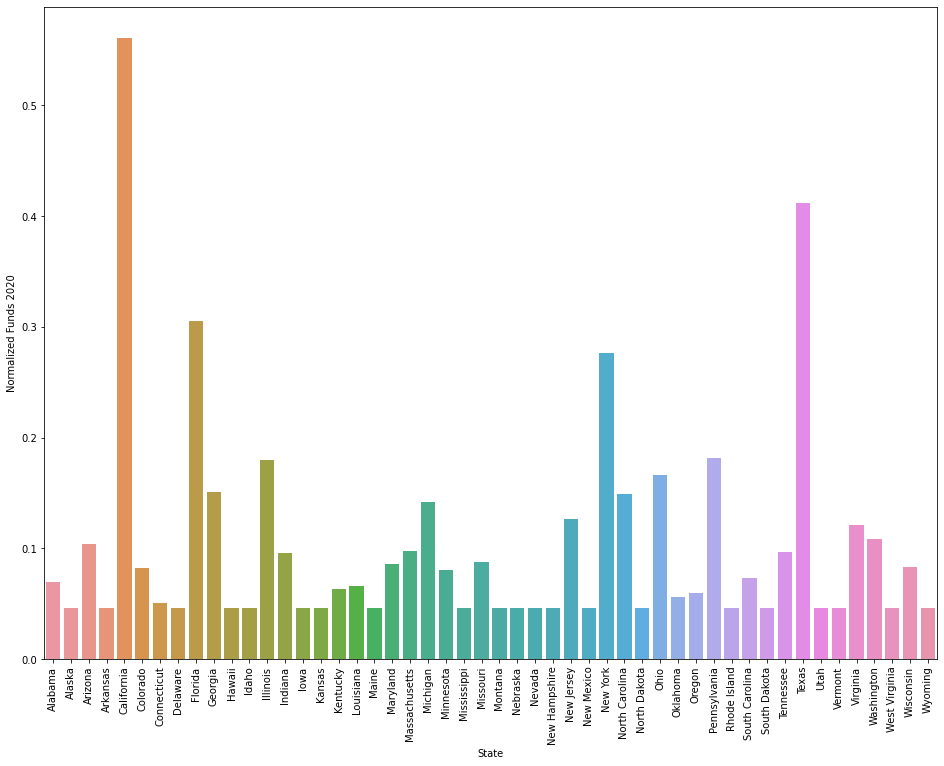

In [106]:
fig, ax = plt.subplots(figsize=(16, 12))
plt.subplots_adjust(hspace=0.5)
ax=sns.barplot(data=population_df, x='State', y='Normalized Funds 2020').set_xticklabels(labels=population_df.State, rotation=90)

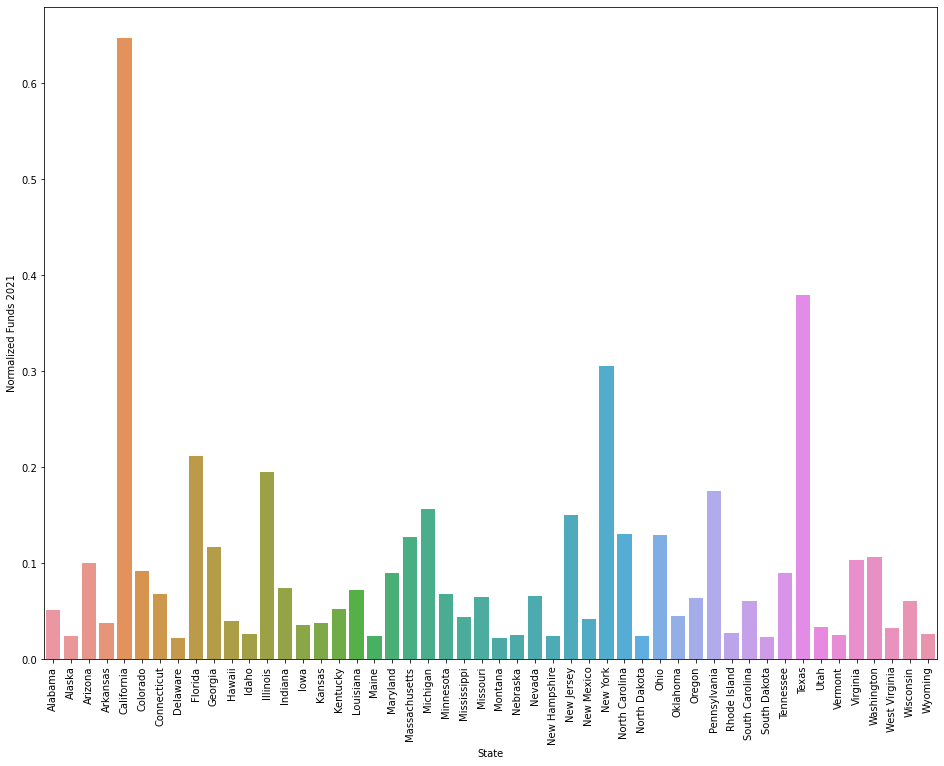

In [101]:
fig, ax = plt.subplots(figsize=(16, 12))
plt.subplots_adjust(hspace=0.5)
ax=sns.barplot(data=population_df, x='State', y='Normalized Funds 2021').set_xticklabels(labels=population_df.State, rotation=90)

#### Normalized the per person cols

In [107]:
funds_per_person_2021_arr = np.array(population_df['Funds Per Person (2021)'])
funds_per_person_2020_arr = np.array(population_df['Funds Per Person (2020)'])
normalized_2021 = preprocessing.normalize([funds_per_person_2021_arr])
normalized_2020 = preprocessing.normalize([funds_per_person_2020_arr])
normalized_list = []
normalized_list2 = []
for element in normalized_2021[0]:
    normalized_list.append(element)
for element in normalized_2020[0]:
    normalized_list2.append(element)

normal_series = pd.Series(normalized_list)
normal_series2 = pd.Series(normalized_list2)

population_df['Normalized Per Person Funds 2021'] = normal_series
population_df['Normalized Per Person Funds 2020'] = normal_series2

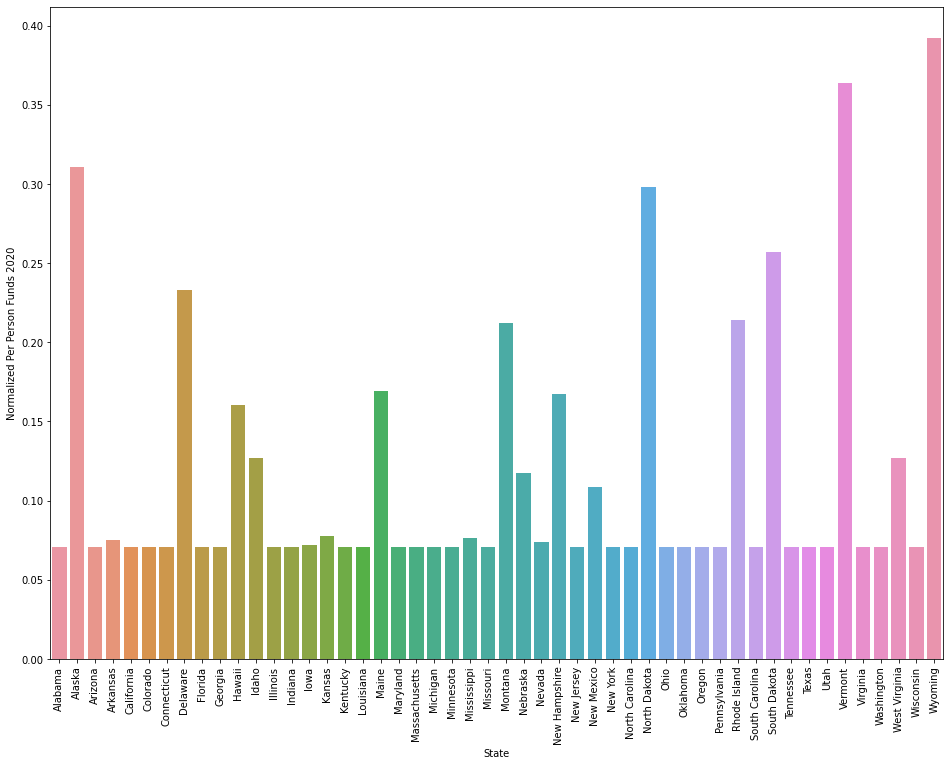

In [108]:
fig, ax = plt.subplots(figsize=(16, 12))
plt.subplots_adjust(hspace=0.5)
ax=sns.barplot(data=population_df, x='State', y='Normalized Per Person Funds 2020').set_xticklabels(labels=population_df.State, rotation=90)

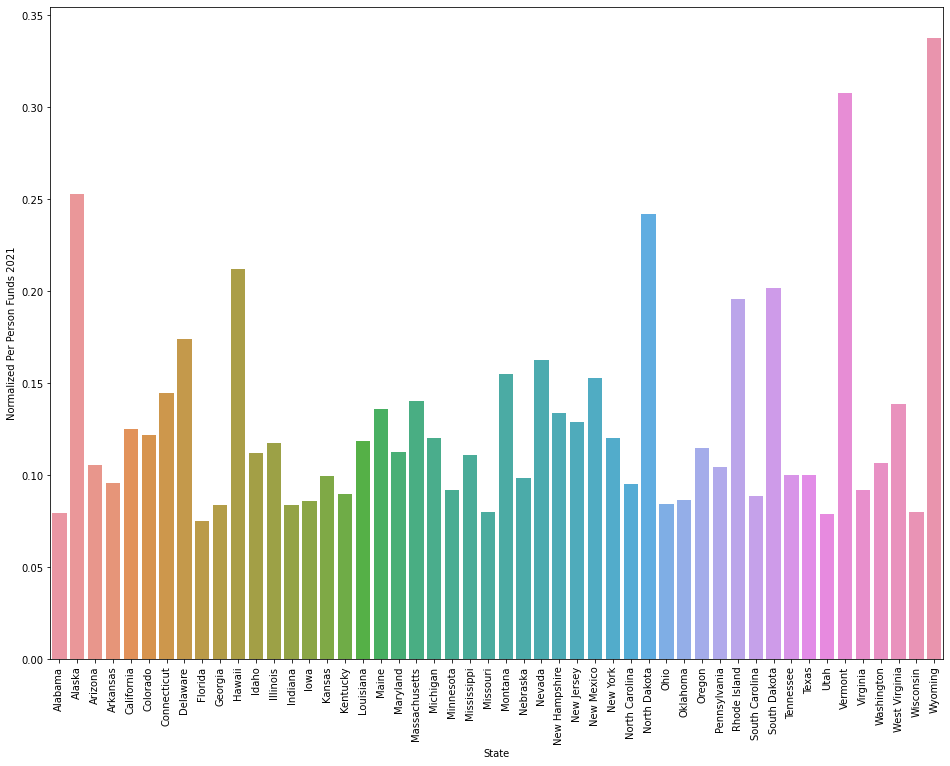

In [103]:
fig, ax = plt.subplots(figsize=(16, 12))
plt.subplots_adjust(hspace=0.5)
ax=sns.barplot(data=population_df, x='State', y='Normalized Per Person Funds 2021').set_xticklabels(labels=population_df.State, rotation=90)

In [69]:
# population_df.to_csv('data/final_state_funds_with_pop.csv', index=False)

## Processing HRR datasets 

# Don't focus on the HRR datasets, as they are estimates, not official numbers!
- wasted time unfortunately :(

In [ ]:
with open('data/HRR_perc_20.csv') as f:
    HRR_20_df=pd.read_csv(f, delimiter=',')

In [ ]:
# Convert location of hospitals from cities to states

HRR_20_df = HRR_20_df.dropna()
def city_to_state(vals):
    new_vals = []
    for val in vals:
        val = str(us.states.lookup(val[-2:]))
        new_vals.append(val)
    return new_vals

HRR_20_df['HRR'] = city_to_state(HRR_20_df.HRR.values)
HRR_20_df = HRR_20_df.drop(columns=['Adult Population', 'Population 65+'])

In [ ]:
# Dropping the columns containing predicted values of the dataset as we are not trying to predict anything on the hospitals,
# if they were official values from the hospitals, they could be useful.

# HRR_20_df = HRR_20_df.drop(columns=HRR_20_df.columns[7:])
# HRR_20_df.to_csv('data/HRR_info.csv', index=False)


# HRR_info_df.head()
# HRR_20_df.groupby(['HRR']).sum()
# HRR_20_df.dtypes 
# need to replace special characters (% , .) and convert objects to numerics
# for percentage columns, left shift twice

In [64]:
# with open('data/HRR_info.csv') as f:
#     HRR_info_df=pd.read_csv(f, delimiter=',')

## New Hospital Dataset

### Some Things to Keep mind
- Some columns are unnecessary. Share with others what could possibly be used/what should be kept
- I don't want to drop rows with nulls, NaN errors, because unless duplicated, each row should contain useful info
- Convert the values to int/floats (numerics) 

In [3]:
with open('data/Patient_Impact_Hospital_Capacity.csv') as f:
    pihc_df=pd.read_csv(f, delimiter=',')
    
pihc_df

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (27,28,29,46,47,48,92,99,100,101,102,103,104) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,hospital_pk,collection_week,state,ccn,hospital_name,address,city,zip,hospital_subtype,fips_code,...,previous_day_admission_pediatric_covid_confirmed_7_day_coverage,previous_day_admission_adult_covid_suspected_7_day_coverage,previous_day_admission_pediatric_covid_suspected_7_day_coverage,previous_week_personnel_covid_vaccinated_doses_administered_7_day_max,total_personnel_covid_vaccinated_doses_none_7_day_min,total_personnel_covid_vaccinated_doses_one_7_day_max,total_personnel_covid_vaccinated_doses_all_7_day_max,previous_week_patients_covid_vaccinated_doses_one_7_day_max,previous_week_patients_covid_vaccinated_doses_all_7_day_max,is_corrected
0,aab2bb3ab769da90baf57242c96ec481afb5ec6a233784...,2021/05/21,LA,NaN,Crescent City Surgical Centre,NaN,NaN,70118.0,Short Term,NaN,...,7,7,7,0,64,0,99,0,0,False
1,ee04edd185865c38c839812cb2eb5ae5d3f8922e3b629e...,2021/05/21,LA,NaN,Alexandria Emergency Hospital,5900 Coliseum Blvd,Alexandria,71303.0,Short Term,NaN,...,7,7,7,0,37,26,26,0,0,False
2,3b081d5ef1c552538e4af4aa593a857bb922a4f364a412...,2021/05/21,LA,NaN,Surgery Center of Zachary,NaN,NaN,70791.0,Short Term,NaN,...,7,7,7,0,0,0,0,0,0,False
3,f70d7abf93c78280583ac18e896e6737cca8212b017513...,2021/05/21,NV,NaN,Elite Medical Center,150 E Harmon Ave,Las Vegas,89109.0,Short Term,NaN,...,7,7,7,NaN,NaN,NaN,NaN,NaN,NaN,False
4,010108,2021/05/21,AL,010108,PRATTVILLE BAPTIST HOSPITAL,124 S MEMORIAL DR,PRATTVILLE,36067.0,Short Term,1001.0,...,7,7,7,"-999,999",213,"-999,999",179,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214479,400130,2020/07/31,PR,400130,HOSPITAL METROPOLITANO DE LA MONTANA,CALLE ISAAC GONZALEZ ESQUINA LEDESMA,BDA NUEVA,641.0,Short Term,72141.0,...,7,7,7,NaN,NaN,NaN,NaN,NaN,NaN,False
214480,400115,2020/07/31,PR,400115,CENTRO MEDICO WILMA N VAZQUEZ,CARR. 2 KM 39.5 ROAD NUMBER 2 BO ALGARROBO,VEGA BAJA,693.0,Short Term,72145.0,...,7,7,7,NaN,NaN,NaN,NaN,NaN,NaN,False
214481,400110,2020/07/31,PR,400110,HOSPITAL METROPOLITANO DR TITO MATTEI,ROAD 128 KM 1.0,YAUCO,698.0,Short Term,72153.0,...,7,7,7,NaN,NaN,NaN,NaN,NaN,NaN,False
214482,480002,2020/07/31,VI,480002,GOV JUAN F LUIS HOSPITAL & MEDICAL CTR,"#4007 EST DIAMOND RUBY, CHRISTIANSTED",ST CROIX,820.0,Short Term,78010.0,...,7,7,7,NaN,NaN,NaN,NaN,NaN,NaN,False


In [8]:
pihc_df.dtypes.to_dict()

{'hospital_pk': dtype('O'),
 'collection_week': dtype('O'),
 'state': dtype('O'),
 'ccn': dtype('O'),
 'hospital_name': dtype('O'),
 'address': dtype('O'),
 'city': dtype('O'),
 'zip': dtype('float64'),
 'hospital_subtype': dtype('O'),
 'fips_code': dtype('float64'),
 'is_metro_micro': dtype('bool'),
 'total_beds_7_day_avg': dtype('O'),
 'all_adult_hospital_beds_7_day_avg': dtype('O'),
 'all_adult_hospital_inpatient_beds_7_day_avg': dtype('O'),
 'inpatient_beds_used_7_day_avg': dtype('O'),
 'all_adult_hospital_inpatient_bed_occupied_7_day_avg': dtype('O'),
 'total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg': dtype('O'),
 'total_adult_patients_hospitalized_confirmed_covid_7_day_avg': dtype('O'),
 'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg': dtype('O'),
 'total_pediatric_patients_hospitalized_confirmed_covid_7_day_avg': dtype('O'),
 'inpatient_beds_7_day_avg': dtype('O'),
 'total_icu_beds_7_day_avg': dtype('O'),
 'total_staffed

In [13]:
# pihc_df.iloc[:,11:].dtypes == "object"

pihc_df.astype({'previous_week_personnel_covid_vaccinated_doses_administered_7_day_max':'int64'})

# temp_cols = pihc_df.iloc[:,11:].select_dtypes("object").columns
# for row in temp_cols:
#     try:
#         pihc_df.astype({'{row}':'int64'})
#     except:
#         pihc_df.astype({'{row}':'float'})
            
#     pihc_df.iloc[:,11:].select_dtypes("object")
    
# temp_df = pihc_df.iloc[:,11:].select_dtypes("object").astype('int64', errors='ignore')
# temp_df = temp_df.select_dtypes("object").astype('float', errors='ignore')
# temp_df

ValueError: cannot convert float NaN to integer

In [11]:
temp_df.dtypes.to_dict()

{'total_beds_7_day_avg': dtype('O'),
 'all_adult_hospital_beds_7_day_avg': dtype('O'),
 'all_adult_hospital_inpatient_beds_7_day_avg': dtype('O'),
 'inpatient_beds_used_7_day_avg': dtype('O'),
 'all_adult_hospital_inpatient_bed_occupied_7_day_avg': dtype('O'),
 'total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg': dtype('O'),
 'total_adult_patients_hospitalized_confirmed_covid_7_day_avg': dtype('O'),
 'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg': dtype('O'),
 'total_pediatric_patients_hospitalized_confirmed_covid_7_day_avg': dtype('O'),
 'inpatient_beds_7_day_avg': dtype('O'),
 'total_icu_beds_7_day_avg': dtype('O'),
 'total_staffed_adult_icu_beds_7_day_avg': dtype('O'),
 'icu_beds_used_7_day_avg': dtype('O'),
 'staffed_adult_icu_bed_occupancy_7_day_avg': dtype('O'),
 'staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_avg': dtype('O'),
 'staffed_icu_adult_patients_confirmed_covid_7_day_avg': dtype('O'),
 'total_pati

In [138]:
pihc_df.loc[pihc_df[11:].dtypes == "object"].astype('int64')

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [12]:
pihc_df.head()

,hospital_pk,collection_week,state,ccn,hospital_name,address,city,zip,hospital_subtype,fips_code,...,previous_day_admission_pediatric_covid_confirmed_7_day_coverage,previous_day_admission_adult_covid_suspected_7_day_coverage,previous_day_admission_pediatric_covid_suspected_7_day_coverage,previous_week_personnel_covid_vaccinated_doses_administered_7_day_max,total_personnel_covid_vaccinated_doses_none_7_day_min,total_personnel_covid_vaccinated_doses_one_7_day_max,total_personnel_covid_vaccinated_doses_all_7_day_max,previous_week_patients_covid_vaccinated_doses_one_7_day_max,previous_week_patients_covid_vaccinated_doses_all_7_day_max,is_corrected
0,aab2bb3ab769da90baf57242c96ec481afb5ec6a233784...,2021/05/21,LA,NaN,Crescent City Surgical Centre,NaN,NaN,70118.0,Short Term,NaN,...,7,7,7,0,64,0,99,0,0,False
1,ee04edd185865c38c839812cb2eb5ae5d3f8922e3b629e...,2021/05/21,LA,NaN,Alexandria Emergency Hospital,5900 Coliseum Blvd,Alexandria,71303.0,Short Term,NaN,...,7,7,7,0,37,26,26,0,0,False
2,3b081d5ef1c552538e4af4aa593a857bb922a4f364a412...,2021/05/21,LA,NaN,Surgery Center of Zachary,NaN,NaN,70791.0,Short Term,NaN,...,7,7,7,0,0,0,0,0,0,False
3,f70d7abf93c78280583ac18e896e6737cca8212b017513...,2021/05/21,NV,NaN,Elite Medical Center,150 E Harmon Ave,Las Vegas,89109.0,Short Term,NaN,...,7,7,7,NaN,NaN,NaN,NaN,NaN,NaN,False
4,010108,2021/05/21,AL,010108,PRATTVILLE BAPTIST HOSPITAL,124 S MEMORIAL DR,PRATTVILLE,36067.0,Short Term,1001.0,...,7,7,7,"-999,999",213,"-999,999",179,0,0,False


In [11]:
pihc_df.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('bool'), dtype('int64')],
      dtype=object)